In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
X,Y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-6.78757501,  4.96660646],
       [ 6.79551938,  7.7462008 ],
       [ 7.33545173,  9.12170776],
       ...,
       [-6.23177422, -8.98055431],
       [ 6.12830918,  5.94854673],
       [-7.47037726, -7.56442859]], shape=(1000, 2))

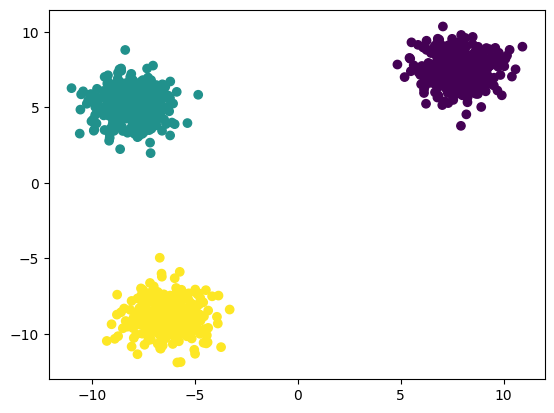

In [13]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [14]:
   # feature scaling 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
scaler.fit_transform(X)

array([[-0.64040675,  0.50310758],
       [ 1.23809167,  0.88208775],
       [ 1.31276258,  1.06962946],
       ...,
       [-0.56354128, -1.39849991],
       [ 1.14581864,  0.63698895],
       [-0.73483611, -1.20542009]], shape=(1000, 2))

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [19]:
Scaler_x_test=scaler.transform(X_test)
scaler_x_train=scaler.fit_transform(X_train)

# bulid the  clustering model

In [21]:
from sklearn.cluster import KMeans


elbow methos for the selct of the k value

In [23]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(scaler_x_train)
    wcss.append(kmeans.inertia_)
    

In [25]:
wcss

[1400.0000000000016,
 466.9326561888928,
 28.587089977473678,
 25.650007446692115,
 22.173719907340054,
 19.556737917771642,
 17.37513639356814,
 15.11416933438068,
 12.861502459208621,
 12.181969701059781]

plot the elbow curve

Text(0, 0.5, 'wcss value')

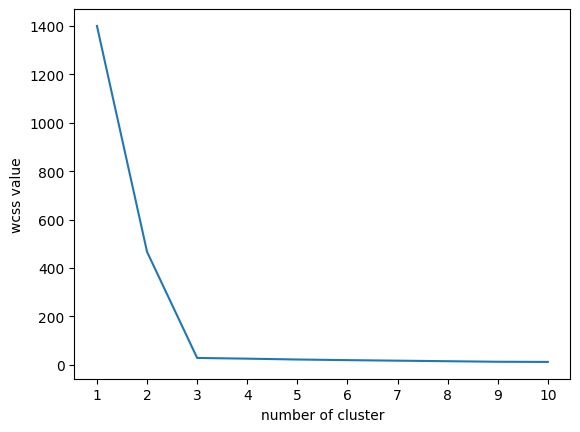

In [26]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of cluster")
plt.ylabel("wcss value")

# Valdating the K value

# kneelocator 

In [32]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [33]:
kl.elbow

np.int64(3)

# silhoute score

In [34]:
from sklearn.metrics import silhouette_score


In [35]:
sli_coffe=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(scaler_x_train)
    score=silhouette_score(scaler_x_train,kmeans.labels_)
    sli_coffe.append(score)

In [36]:
sli_coffe

[0.6793838944647931,
 0.8748142365828604,
 0.6854289829952274,
 0.4875821454823561,
 0.5018179010814785,
 0.3338534723747116,
 0.3302416587630603,
 0.3424918672059586,
 0.34093820867418895]

Text(0, 0.5, 'silhoute score')

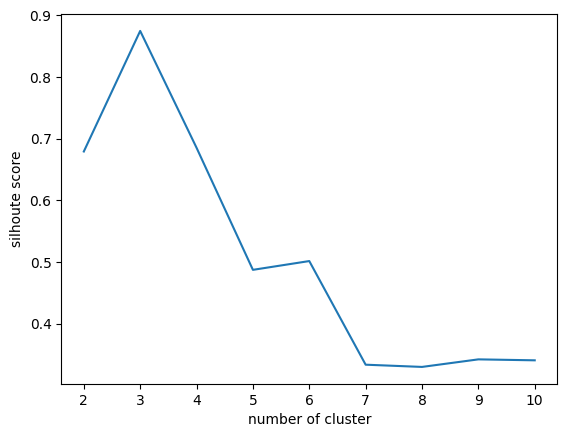

In [38]:
plt.plot(range(2,11),sli_coffe)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("silhoute score")

obersvation : k value is 3